In [1]:
# pip install gspread
#pip install reportlab

In [184]:
import gspread
import numpy as np
from google.oauth2.credentials import Credentials
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler
from reportlab.lib.pagesizes import letter, landscape
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Image,Paragraph, Table, TableStyle
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.application import MIMEApplication
from email import encoders
from tensorflow.keras.models import Sequential
from io import BytesIO
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [185]:
gc = gspread.service_account(filename='credentials.json')
# sheet = gc.open('IFTTT_Maker_Webhooks_Events (1)').sheet1 
sheet = gc.open('IFTTT_Maker_Webhooks_Events').sheet1 
data = sheet.get_all_values()

In [186]:
df = pd.DataFrame(data[1:], columns=data[0])

In [187]:
# df = pd.read_excel('SEND_new_new.xls')
# df = pd.read_excel('testingData.xls')
# df = pd.read_csv('Datasets/Test_Resorces/realfishdataset.csv')
# df = pd.read_excel('Datasets/Test_Resorces/SEND_new.xls')
# df = pd.read_csv('Datasets/Test_Resources/sensorData.csv')


In [188]:
df

,Occurance,Storage,Temperature,Turbidity,pH
0,"March 2, 2023 at 08:46PM",data_storage,41,10,6
1,"March 3, 2023 at 02:49PM",data_storage,33,12.93,6
2,"March 3, 2023 at 02:49PM",data_storage,33,12.89,6
3,"March 3, 2023 at 02:49PM",data_storage,33,12.88,6
4,"March 4, 2023 at 02:49PM",data_storage,33,12.97,6
...,...,...,...,...,...
673,"April 26, 2023 at 05:26PM",data_storage,25.5,6.53,6
674,"April 26, 2023 at 05:26PM",data_storage,25.5,6.58,7
675,"April 26, 2023 at 05:26PM",data_storage,26,6.54,10
676,"April 26, 2023 at 05:26PM",data_storage,26,6.54,5


In [189]:
df_copy = df

In [190]:
# water_quality_counts = df['Result'].value_counts()

# print("Count of 0s (not good water quality):", water_quality_counts[0])
# print("Count of 1s (good water quality):", water_quality_counts[1])

In [191]:
df =df.drop('Occurance',axis =1)
df = df.drop('Storage', axis=1)

In [192]:
df

,Temperature,Turbidity,pH
0,41,10,6
1,33,12.93,6
2,33,12.89,6
3,33,12.88,6
4,33,12.97,6
...,...,...,...
673,25.5,6.53,6
674,25.5,6.58,7
675,26,6.54,10
676,26,6.54,5


In [193]:
df_copy['DateTime'] = pd.to_datetime(df_copy['Occurance'])
df_copy['Date'] = df_copy['DateTime'].dt.date

In [194]:
df_copy

,Occurance,Storage,Temperature,Turbidity,pH,DateTime,Date
0,"March 2, 2023 at 08:46PM",data_storage,41,10,6,2023-03-02 20:46:00,2023-03-02
1,"March 3, 2023 at 02:49PM",data_storage,33,12.93,6,2023-03-03 14:49:00,2023-03-03
2,"March 3, 2023 at 02:49PM",data_storage,33,12.89,6,2023-03-03 14:49:00,2023-03-03
3,"March 3, 2023 at 02:49PM",data_storage,33,12.88,6,2023-03-03 14:49:00,2023-03-03
4,"March 4, 2023 at 02:49PM",data_storage,33,12.97,6,2023-03-04 14:49:00,2023-03-04
...,...,...,...,...,...,...,...
673,"April 26, 2023 at 05:26PM",data_storage,25.5,6.53,6,2023-04-26 17:26:00,2023-04-26
674,"April 26, 2023 at 05:26PM",data_storage,25.5,6.58,7,2023-04-26 17:26:00,2023-04-26
675,"April 26, 2023 at 05:26PM",data_storage,26,6.54,10,2023-04-26 17:26:00,2023-04-26
676,"April 26, 2023 at 05:26PM",data_storage,26,6.54,5,2023-04-26 17:26:00,2023-04-26


In [195]:
df

,Temperature,Turbidity,pH
0,41,10,6
1,33,12.93,6
2,33,12.89,6
3,33,12.88,6
4,33,12.97,6
...,...,...,...
673,25.5,6.53,6
674,25.5,6.58,7
675,26,6.54,10
676,26,6.54,5


In [196]:
# from tensorflow.keras.models import load_model
# model = load_model('./neural_net')

In [197]:
#reading our model
model = pickle.load(open('model_knn_final.pkl','rb'))
# model = pickle.load(open('model_logistic.pkl','rb'))
# model = pickle.load(open('model_knn.pkl','rb'))
# model = pickle.load(open('model_neural.pkl','rb'))
# model = pickle.load(open('model_tree.pkl','rb'))

In [198]:
X_test = df[['Temperature', 'Turbidity', 'pH']]
y_pred = model.predict(X_test)
df['water_quality'] = y_pred

water_quality_counts = df['water_quality'].value_counts()
print("Count of 0s (not good water quality):", water_quality_counts[0])
print("Count of 1s (good water quality):", water_quality_counts[1])

print(df['water_quality'])

Count of 0s (not good water quality): 164
Count of 1s (good water quality): 514
0      0
1      1
2      1
3      1
4      1
      ..
673    1
674    1
675    0
676    0
677    0
Name: water_quality, Length: 678, dtype: int64


In [199]:
df

,Temperature,Turbidity,pH,water_quality
0,41,10,6,0
1,33,12.93,6,1
2,33,12.89,6,1
3,33,12.88,6,1
4,33,12.97,6,1
...,...,...,...,...
673,25.5,6.53,6,1
674,25.5,6.58,7,1
675,26,6.54,10,0
676,26,6.54,5,0


In [200]:
percent_good_water = np.mean(y_pred) * 100
print(percent_good_water)

75.81120943952803


In [201]:
# df_copy = df_copy.join(df.set_index('water_quality'), on='water_quality')

In [202]:
# Get the last 30 days' data
last_30_days_df = df_copy.tail(300)
print(last_30_days_df)
# last_30_days_df.describe()
last_30_days_df['Temperature'] = last_30_days_df['Temperature'].astype(float)
last_30_days_df['pH'] = last_30_days_df['pH'].astype(float)
last_30_days_df['Turbidity'] = last_30_days_df['Turbidity'].astype(float)


                     Occurance       Storage Temperature Turbidity  pH  \
378   April 8, 2023 at 02:13PM  data_storage          27      6.97   9   
379   April 8, 2023 at 02:13PM  data_storage          27      6.98   6   
380   April 9, 2023 at 04:39PM  data_storage          27      7.18   9   
381   April 9, 2023 at 04:39PM  data_storage          27      1.13   7   
382   April 9, 2023 at 04:39PM  data_storage          27     11.61   6   
..                         ...           ...         ...       ...  ..   
673  April 26, 2023 at 05:26PM  data_storage        25.5      6.53   6   
674  April 26, 2023 at 05:26PM  data_storage        25.5      6.58   7   
675  April 26, 2023 at 05:26PM  data_storage          26      6.54  10   
676  April 26, 2023 at 05:26PM  data_storage          26      6.54   5   
677  April 26, 2023 at 05:26PM  data_storage          26      6.55  11   

               DateTime        Date  
378 2023-04-08 14:13:00  2023-04-08  
379 2023-04-08 14:13:00  2023-04-08

C:\Users\sejal\AppData\Local\Temp\ipykernel_15992\3141428494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_30_days_df['Temperature'] = last_30_days_df['Temperature'].astype(float)
C:\Users\sejal\AppData\Local\Temp\ipykernel_15992\3141428494.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_30_days_df['pH'] = last_30_days_df['pH'].astype(float)
C:\Users\sejal\AppData\Local\Temp\ipykernel_15992\3141428494.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [203]:
grouped_data = last_30_days_df.groupby('DateTime')[['Temperature','Turbidity','pH']].mean()

In [204]:
# # Extract the feature values for each day
# X_test = grouped_data[['Temperature', 'Turbidity', 'pH']]

# # # Scale the feature values
# # scaler = MinMaxScaler()
# # X_scaled = scaler.fit_transform(X_test)

# # # Make predictions for each day
# y_pred = model.predict(X_test)
# grouped_data['water_quality'] = y_pred
# print(y_pred)
# # # Calculate the percentage of good water quality for the last 30 days
# percent_good_water = np.mean(y_pred) * 100
# print(percent_good_water)
# accuracy = accuracy_score(y_pred, df['water_quality'])
# print("Accuracy of testing dataset:",accuracy)
# print("Classification report:\n",classification_report(y_pred,df['water_quality']))
# cm = confusion_matrix(y_pred,df['water_quality'])
# print("confusion matrix\n",cm)

In [205]:
# CREATING CHARTS

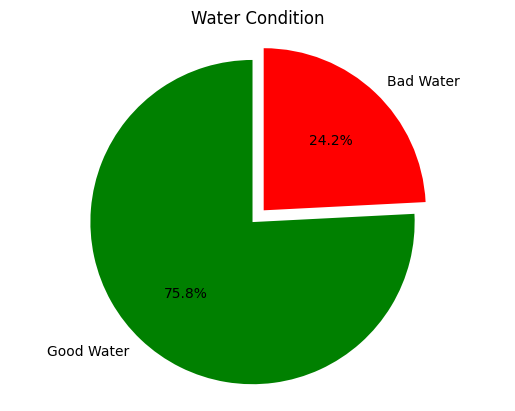

In [206]:
percent_bad_water = 100 - percent_good_water

# Create a pie chart
labels = ['Good Water', 'Bad Water']
sizes = [percent_good_water, percent_bad_water]
colors = ['green', 'red']
explode = (0.1, 0)  
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal') 
plt.title('Water Condition')

plt.savefig('water_condition_pie_chart.png')

plt.show()

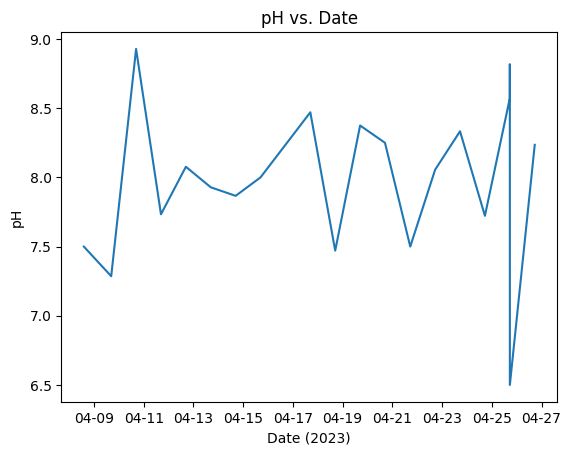

In [207]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plot temperature data
fig, ax = plt.subplots()
ax.plot(grouped_data.index, grouped_data['pH'])
ax.set(xlabel='Date (2023)', ylabel='pH', title='pH vs. Date')

date_form = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# save the plot as a PNG file
fig.savefig('pH_plot.png')

plt.show()

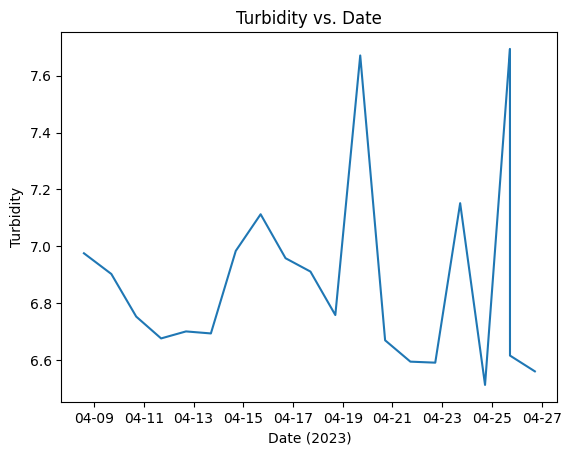

In [208]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plot temperature data
fig, ax = plt.subplots()
ax.plot(grouped_data.index, grouped_data['Turbidity'])
ax.set(xlabel='Date (2023)', ylabel='Turbidity', title='Turbidity vs. Date')

# format the x-axis ticks with month-day format
date_form = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# save the plot as a PNG file
fig.savefig('Turbidity_plot.png')

plt.show()

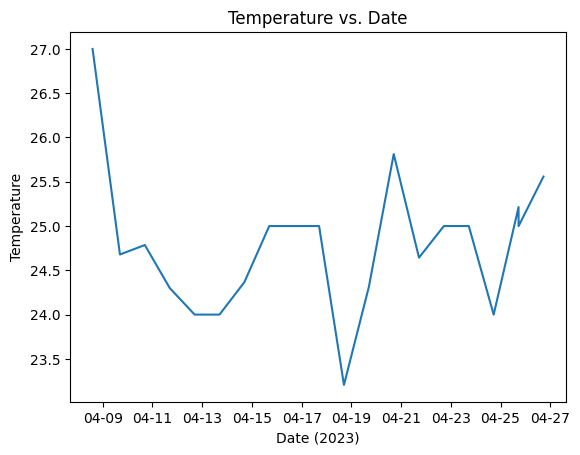

In [209]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plot temperature data
fig, ax = plt.subplots()
ax.plot(grouped_data.index, grouped_data['Temperature'])
ax.set(xlabel='Date (2023)', ylabel='Temperature', title='Temperature vs. Date')

# format the x-axis ticks with month-day format
date_form = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# save the plot as a PNG file
fig.savefig('temperature_plot.png')

plt.show()

In [210]:
# Creating pdf and sending mail

In [211]:
from report_generator import create_report
create_report()

In [212]:
with open('report.pdf', 'rb') as f:
    pdf_bytes = f.read()

In [213]:
# Create an SMTP instance
smtp_server = "smtp.gmail.com"  
smtp_port = 587  
sender_email = "sejalagarwal1620@gmail.com"  
sender_password = "ezmxgxbbzcjwpwpz"  
recipient_email = "sejal.august16@gmail.com" 

In [214]:
# Create a multipart message
msg = MIMEMultipart()

body = """\
Dear recipient,

Please find attached the monthly report. The report contains important information about the condition of water body over the past month. We hope you find it informative.

Thank you for your attention to this matte and please take action if required.

Best regards,
Team10
"""

msg.attach(MIMEText(body, 'plain'))
pdf_part = MIMEApplication(pdf_bytes, Name='report.pdf')
pdf_part['Content-Disposition'] = f'attachment; filename="report.pdf"'
msg.attach(pdf_part)

In [215]:
msg['From'] = sender_email
msg['To'] = recipient_email
msg['Subject'] = 'Monthly Report of Your Waterbody'

In [216]:
smtp_conn = smtplib.SMTP(smtp_server, smtp_port)
smtp_conn.starttls()
smtp_conn.login(sender_email, sender_password)

# Send the email
smtp_conn.send_message(msg)

{}